In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
telecom_data = pd.read_csv('tel_data.csv')
telecom_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


# Load the Data

In [3]:
telecom_data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08
150000,1.013887e+19,4/26/2019 7:25,499.1882,4/25/2019 0:01,498.80088,104608.560347,2.082016e+14,4.188282e+10,4.847455e+13,D41377B,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08


In [23]:
telecom_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

# session Frequency

In [3]:
import pandas as pd

# Assuming your DataFrame is named 'telecom_data'
telecom_data['Start'] = pd.to_datetime(telecom_data['Start'])
telecom_data['End'] = pd.to_datetime(telecom_data['End'])

# Check for missing values in 'MSISDN/Number' before grouping
if telecom_data['MSISDN/Number'].isnull().any():
    print("Warning: Missing values in 'MSISDN/Number' column.")

# Calculate Session Frequency for each user
session_frequency = telecom_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency.rename(columns={'Bearer Id': 'Session Frequency'}, inplace=True)

# Merge the Session Frequency back into the original DataFrame
telecom_data = pd.merge(telecom_data, session_frequency, on='MSISDN/Number', how='left')

# Display the result DataFrame with the 'Sessions Frequency' column
print(telecom_data[['MSISDN/Number', 'Session Frequency']].head())


   MSISDN/Number  Session Frequency
0   3.366496e+10                  2
1   3.368185e+10                  2
2   3.376063e+10                  1
3   3.375034e+10                  1
4   3.369980e+10                  1


## Duration of session

In [4]:
# Calculate Session Duration in seconds
telecom_data['Session Duration (s)'] = telecom_data['Dur. (ms)'] / 1000

# Display the result
print(telecom_data[['MSISDN/Number', 'Session Duration (s)']].head())


   MSISDN/Number  Session Duration (s)
0   3.366496e+10              1823.652
1   3.368185e+10              1365.104
2   3.376063e+10              1361.762
3   3.375034e+10              1321.509
4   3.369980e+10              1089.009


# Total traffic

In [5]:
# Calculate Session Total Traffic in Bytes
telecom_data['Session Total Traffic (Bytes)'] = telecom_data['Total DL (Bytes)'] + telecom_data['Total UL (Bytes)']

# Display the result
print(telecom_data[['MSISDN/Number', 'Session Total Traffic (Bytes)']].head())
telecom_data.head()

   MSISDN/Number  Session Total Traffic (Bytes)
0   3.366496e+10                    345629377.0
1   3.368185e+10                    707185356.0
2   3.376063e+10                    307690973.0
3   3.375034e+10                    889352748.0
4   3.369980e+10                    607681403.0


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Frequency,Session Duration (s),Session Total Traffic (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2,1823.652,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2,1365.104,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1,1361.762,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1,1321.509,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1,1089.009,607681403.0


In [3]:
# import pandas as pd

# # Assuming your DataFrame is named 'telecom_data'

# # Calculate sessions frequency
# sessions_frequency = telecom_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
# sessions_frequency.rename(columns={'Bearer Id': 'Sessions Frequency'}, inplace=True)
# telecom_data = pd.merge(telecom_data, sessions_frequency, on='MSISDN/Number', how='left')

# # Calculate session duration in seconds
# telecom_data['Duration (s)'] = telecom_data['Dur. (ms)'] / 1000

# # Calculate session total traffic (download and upload)
# telecom_data['Total Traffic (Bytes)'] = telecom_data['Total UL (Bytes)'] + telecom_data['Total DL (Bytes)']

# # Display the resulting DataFrame with new columns
# print(telecom_data[['MSISDN/Number', 'Sessions Frequency', 'Duration (s)', 'Total Traffic (Bytes)']].head())


   MSISDN/Number  Sessions Frequency  Duration (s)  Total Traffic (Bytes)
0   3.366496e+10                   2      1823.652            345629377.0
1   3.368185e+10                   2      1365.104            707185356.0
2   3.376063e+10                   1      1361.762            307690973.0
3   3.375034e+10                   1      1321.509            889352748.0
4   3.369980e+10                   1      1089.009            607681403.0


#### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric¶

In [6]:
import pandas as pd

# Assuming your DataFrame is named 'telecom_data'

# Calculate sessions frequency per MSISDN
sessions_frequency = telecom_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
sessions_frequency.rename(columns={'Bearer Id': 'Sessions Frequency'}, inplace=True)

# Calculate session duration in seconds per MSISDN
session_duration = telecom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum() / 1000
session_duration = session_duration.reset_index()
session_duration.rename(columns={'Dur. (ms)': 'Total Duration (s)'}, inplace=True)

# Calculate session total traffic (download and upload) per MSISDN
session_total_traffic = telecom_data.groupby('MSISDN/Number')['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
session_total_traffic['Total Traffic (Bytes)'] = session_total_traffic['Total UL (Bytes)'] + session_total_traffic['Total DL (Bytes)']
session_total_traffic.reset_index(inplace=True)

# Merge the aggregated metrics into a single DataFrame
agg_metrics = pd.merge(sessions_frequency, session_duration, on='MSISDN/Number', how='outer')
agg_metrics = pd.merge(agg_metrics, session_total_traffic[['MSISDN/Number', 'Total Traffic (Bytes)']], on='MSISDN/Number', how='outer')

# Display the aggregated metrics per MSISDN
print(agg_metrics.head())

# Report the top 10 customers for each metric
top_10_sessions_frequency = agg_metrics.sort_values(by='Sessions Frequency', ascending=False).head(10)
top_10_duration = agg_metrics.sort_values(by='Total Duration (s)', ascending=False).head(10)
top_10_total_traffic = agg_metrics.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)

# Display the top 10 customers for each metric
print("Top 10 Customers by Sessions Frequency:")
print(top_10_sessions_frequency[['MSISDN/Number', 'Sessions Frequency']])

print("\nTop 10 Customers by Total Duration:")
print(top_10_duration[['MSISDN/Number', 'Total Duration (s)']])

print("\nTop 10 Customers by Total Traffic:")
print(top_10_total_traffic[['MSISDN/Number', 'Total Traffic (Bytes)']])



   MSISDN/Number  Sessions Frequency  Total Duration (s)  \
0   3.360100e+10                   1             116.720   
1   3.360100e+10                   1             181.230   
2   3.360100e+10                   1             134.969   
3   3.360101e+10                   1              49.878   
4   3.360101e+10                   2              37.104   

   Total Traffic (Bytes)  
0           8.786906e+08  
1           1.568596e+08  
2           5.959665e+08  
3           4.223207e+08  
4           1.457411e+09  
Top 10 Customers by Sessions Frequency:
        MSISDN/Number  Sessions Frequency
106853   4.188282e+10                1066
13526    3.362632e+10                  18
13180    3.362578e+10                  17
6437     3.361489e+10                  17
37052    3.365973e+10                  16
76363    3.367588e+10                  15
92923    3.376054e+10                  15
65118    3.366716e+10                  13
1279     3.360452e+10                  12
13994    3.362708

In [17]:
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Frequency,Session Duration (s),Session Total Traffic (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2,1823.652,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2,1365.104,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1,1361.762,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1,1321.509,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1,1089.009,607681403.0


In [19]:
# telecom_data.to_csv('engagement_metrics.csv',index=False)

#### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.


   MSISDN/Number  Engagement Group
0   3.360100e+10                 0
1   3.360100e+10                 0
2   3.360100e+10                 0
3   3.360101e+10                 0
4   3.360101e+10                 0

Cluster Centers:
   Sessions Frequency  Total Duration (s)  Total Traffic (Bytes)
0            1.223618          112.995030           6.017623e+08
1         1066.000000        72551.004560           5.317447e+11
2            3.190955          496.489648           1.632979e+09


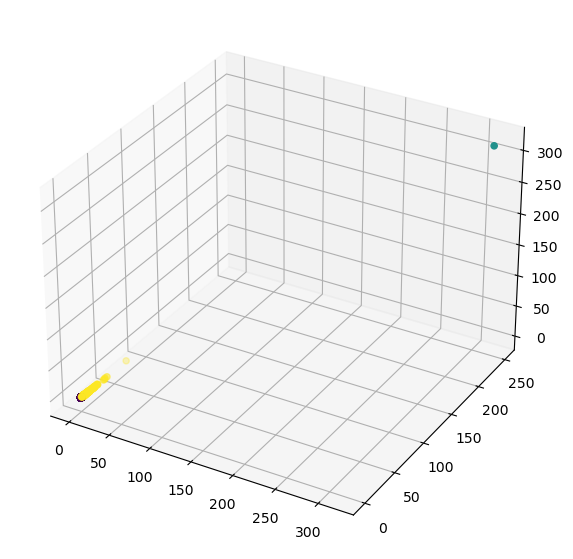

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming your DataFrame is named 'agg_metrics'

# Extract relevant columns for clustering
X = agg_metrics[['Sessions Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']]

# Standardize (normalize) the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
agg_metrics['Engagement Group'] = kmeans.fit_predict(X_scaled)

# Display the engagement group for each customer
# print(agg_metrics[['MSISDN/Number', 'Engagement Group']])
print(agg_metrics[['MSISDN/Number', 'Engagement Group']].head())


# Optional: Display cluster centers and other k-means information
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns))

# Optional: Visualize the clusters (if you have a 3D plot library available)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=agg_metrics['Engagement Group'], cmap='viridis')
plt.show()


#### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

  Engagement Group Sessions Frequency                             \
                                  min   max         mean     sum   
0                0                  1     4     1.224245  119572   
1                1               1066  1066  1066.000000    1066   
2                2                  1    18     3.196495   29363   

  Total Duration (s)                                           \
                 min          max          mean           sum   
0            7.14200    428.46700    113.104512  1.104692e+07   
1        72551.00456  72551.00456  72551.004560  7.255100e+04   
2           89.97300  18553.75400    497.705201  4.571920e+06   

  Total Traffic (Bytes)                                            
                    min           max          mean           sum  
0          3.324901e+07  2.762548e+09  6.020637e+08  5.880357e+13  
1          5.317447e+11  5.317447e+11  5.317447e+11  5.317447e+11  
2          5.714004e+07  8.846226e+09  1.636173e+09  1.502988

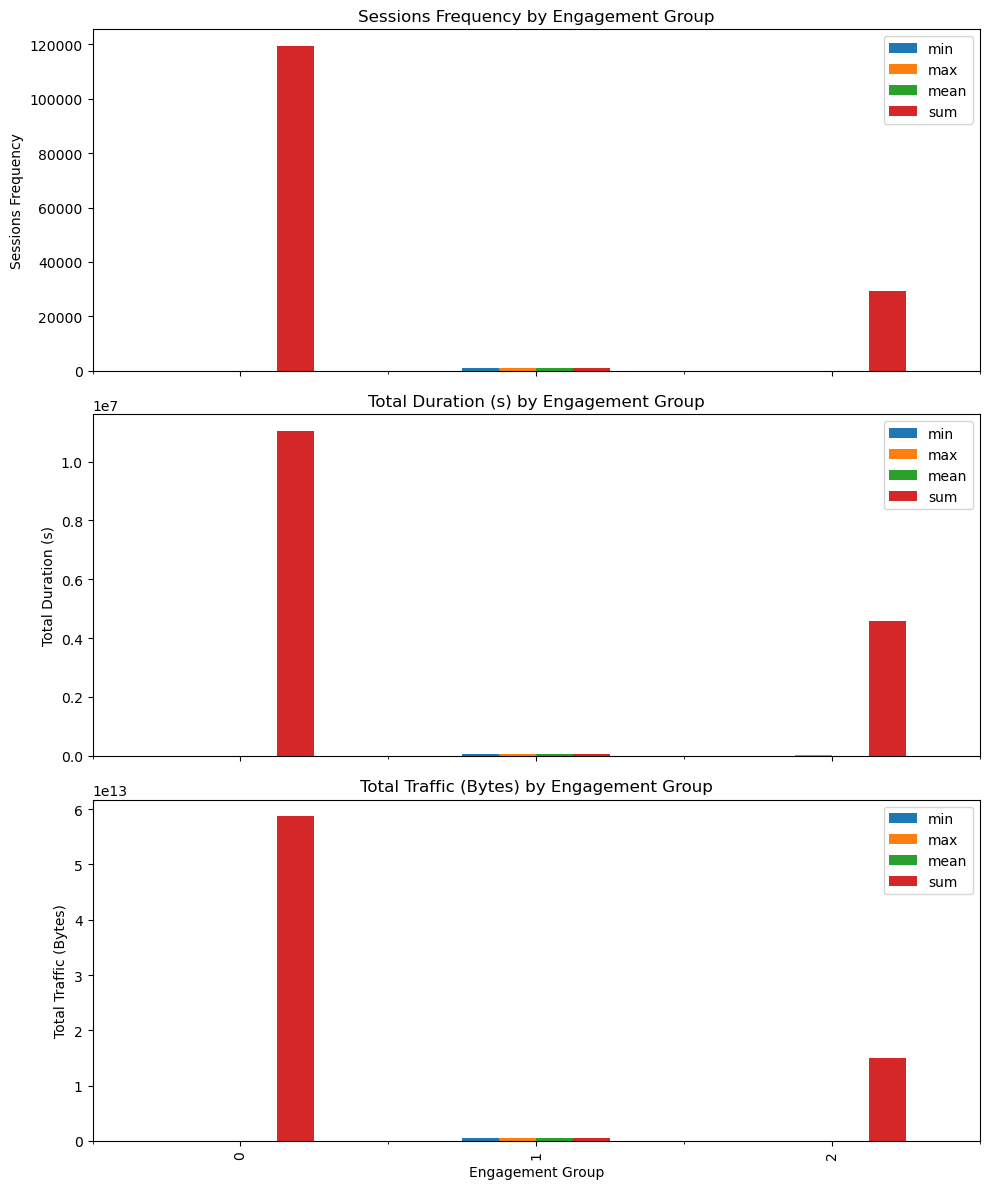

In [10]:
# Assuming 'agg_metrics' DataFrame has the 'Engagement Group' column from the clustering results

# Group by Engagement Group and calculate metrics
cluster_metrics = agg_metrics.groupby('Engagement Group')[['Sessions Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']].agg(['min', 'max', 'mean', 'sum']).reset_index()

# Display the computed metrics
print(cluster_metrics)

# Optional: Visualize the cluster metrics
import matplotlib.pyplot as plt

# Plot metrics for each cluster
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)
metrics = ['Sessions Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']

for i, metric in enumerate(metrics):
    cluster_metrics[metric].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metric} by Engagement Group')
    axes[i].set_xlabel('Engagement Group')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [11]:
# Extract relevant columns for application traffic
app_traffic_columns = ['MSISDN/Number', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a new DataFrame with only the relevant columns
app_traffic_data = telecom_data[app_traffic_columns].copy()

# Group by 'MSISDN/Number' and sum the traffic for each application
user_app_traffic = app_traffic_data.groupby('MSISDN/Number').sum()

# Calculate total traffic per user (sum across all applications)
user_app_traffic['Total Traffic'] = user_app_traffic.sum(axis=1)

# Display the top 10 most engaged users per application
for app in app_traffic_columns[1:]:
    top_10_users_app = user_app_traffic.sort_values(by=app, ascending=False).head(10)
    print(f"\nTop 10 Users for {app} Traffic:")
    print(top_10_users_app[['Total Traffic', app]])


Top 10 Users for Social Media DL (Bytes) Traffic:
               Total Traffic  Social Media DL (Bytes)
MSISDN/Number                                        
4.188282e+10    9.736730e+11             1.937715e+09
3.362632e+10    1.599664e+10             4.274384e+07
3.376054e+10    1.310481e+10             3.929765e+07
3.365973e+10    1.388841e+10             3.490044e+07
3.361489e+10    1.634152e+10             2.774974e+07
3.362578e+10    1.470127e+10             2.656412e+07
3.366716e+10    1.045593e+10             2.375375e+07
3.378632e+10    9.794826e+09             2.356866e+07
3.366907e+10    8.447482e+09             2.347705e+07
3.360313e+10    1.119890e+10             2.277668e+07

Top 10 Users for Social Media UL (Bytes) Traffic:
               Total Traffic  Social Media UL (Bytes)
MSISDN/Number                                        
4.188282e+10    9.736730e+11             3.610230e+07
3.362632e+10    1.599664e+10             6.309420e+05
3.362578e+10    1.470127e+10      

### Plot the top 3 most used applications using appropriate charts. 

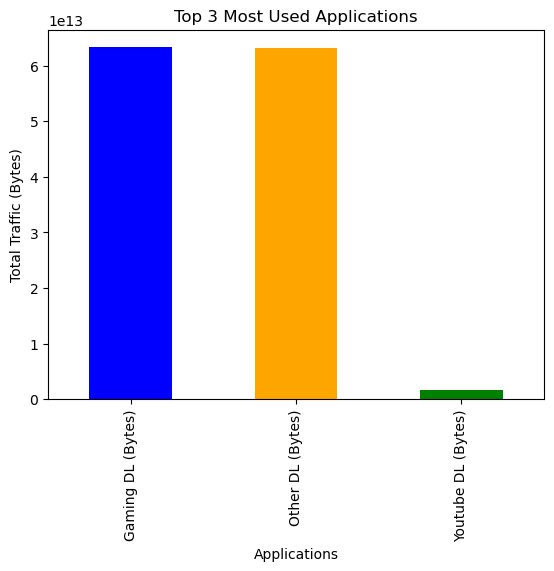

In [12]:
# Select the top 3 applications based on total traffic
top_3_apps = user_app_traffic.drop('Total Traffic', axis=1).sum().nlargest(3).index

# Extract data for the top 3 applications
top_3_apps_data = user_app_traffic[top_3_apps]

# Plot a bar chart
top_3_apps_data.sum().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Top 3 Most Used Applications')
plt.xlabel('Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

#### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
What is the optimized value of k (use the elbow method for this)?  
Interpret your findings. 



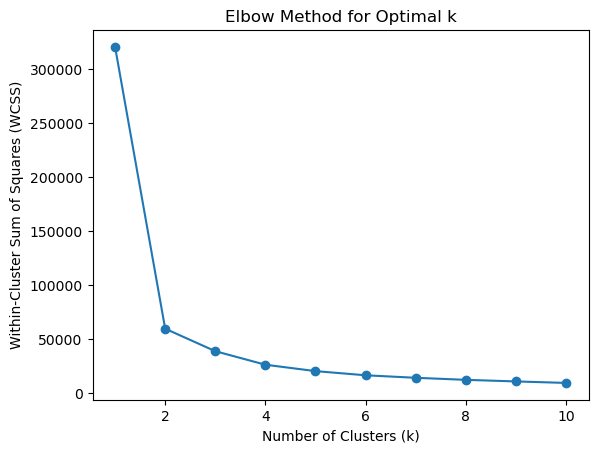

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
X = agg_metrics[['Sessions Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of k values
k_values = range(1, 11)  # You can adjust the range based on your specific needs

# Run K-means for each k and collect the inertia (WCSS) values
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

Interpret the Elbow Curve:
The optimal value for k is often identified at the "elbow" point where the WCSS starts to decrease at a slower rate. In the plot, look for the point where adding more clusters does not significantly reduce the WCSS. This is the point where the curve bends or forms an "elbow."

If you see a clear elbow in the plot, it suggests a good candidate for the optimal number of clusters. However, sometimes the curve may not have a distinct elbow, and you may need to use additional methods or domain knowledge to determine the best value for k.

In [ ]:
t